In [ ]:
# K-Nearest Neighbors (KNN)
# Brut Force algorithm
# K-D Tree algorithm
# Ball Tree algorithm
# The query time of Brute Force algorithm grows as O[DN].
# The query time of Ball tree algorithm grows as O[D log(N)].
# The query time of KD tree algorithm changes with D in a strange manner that is very difficult to characterize. When D < 20, the cost is O[D log(N)] and this algorithm is very efficient. On # the other hand, it is inefficient in case when D > 20 because the cost increases to nearly O[DN].


In [10]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
Input_data = np.array([[-1, 1], [-2, 2], [-3, 3], [1, 2], [2, 3], [3, 4],[4, 5]])
nrst_neigh = NearestNeighbors(n_neighbors = 3, algorithm='ball_tree')
nrst_neigh.fit(Input_data)
distances, indices = nrst_neigh.kneighbors(Input_data)
indices

array([[0, 1, 3],
       [1, 2, 0],
       [2, 1, 0],
       [3, 4, 0],
       [4, 5, 3],
       [5, 6, 4],
       [6, 5, 4]], dtype=int64)

In [11]:
distances

array([[0.        , 1.41421356, 2.23606798],
       [0.        , 1.41421356, 1.41421356],
       [0.        , 1.41421356, 2.82842712],
       [0.        , 1.41421356, 2.23606798],
       [0.        , 1.41421356, 1.41421356],
       [0.        , 1.41421356, 1.41421356],
       [0.        , 1.41421356, 2.82842712]])

In [12]:
nrst_neigh.kneighbors_graph(Input_data).toarray()

array([[1., 1., 0., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0.],
       [1., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.]])

In [14]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
Input_data = np.array([[-1, 1], [-2, 2], [-3, 3], [1, 2], [2, 3], [3, 4],[4, 5]])
nrst_neigh = NearestNeighbors(n_neighbors = 3, algorithm='ball_tree')
nrst_neigh.fit(Input_data)
distances, indices = nrst_neigh.kneighbors(Input_data)
indices
distances
nrst_neigh.kneighbors_graph(Input_data).toarray()

array([[1., 1., 0., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0.],
       [1., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.]])

In [15]:
# KNeighborsClassifier
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.feature_names)
# 0 = setos, 1 = versicolor and 2 = virginica.

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [16]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [17]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [18]:
print(iris.data.shape)

(150, 4)


In [23]:
X = iris.data[:, :4]
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(105, 4)
(45, 4)


In [24]:
print(y_train.shape)
print(y_test.shape)

(105,)
(45,)


Confusion Matrix:
[[18  0  0]
 [ 0 17  1]
 [ 0  1  8]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.94      0.94      0.94        18
           2       0.89      0.89      0.89         9

    accuracy                           0.96        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.96      0.96      0.96        45



Text(0, 0.5, 'Accuracy')

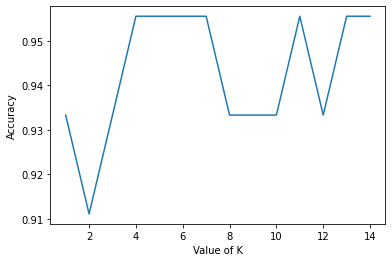

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#We are going to run it for k = 1 to 15 and will be recording testing accuracy, plotting it, showing confusion matrix and classification report:
Range_k = range(1,15)
scores = {}
scores_list = []
for k in Range_k:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
result = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(y_test, y_pred)
print("Classification Report:")
print (result1)
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(Range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

In [37]:
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [41]:
classes = {0:'setosa',1:'versicolor',2:'virginicia'}
x_new = [[1,1,1,1],[4,3,1.3,0.2]]
y_predict = classifier.predict(x_new)
print(classes[y_predict[0]])
print(classes[y_predict[1]])

virginicia
virginicia


['setosa' 'versicolor' 'virginica']
(150, 4)
(105, 4)
(45, 4)
Confusion Matrix:
[[16  0  0]
 [ 0 11  1]
 [ 0  1 16]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      0.92      0.92        12
           2       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

virginicia
virginicia


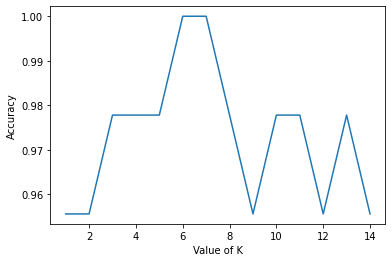

In [57]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.target_names)
print(iris.data.shape)
X = iris.data[:, :4]
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

Range_k = range(1,15)
scores = {}
scores_list = []
for k in Range_k:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

result = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(Range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)
classes = {0:'setosa',1:'versicolor',2:'virginicia'}
x_new = [[1,1,1,1],[4,3,1.3,0.2]]
y_predict = classifier.predict(x_new)
print(classes[y_predict[0]])
print(classes[y_predict[1]])

In [58]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, :4]
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
import numpy as np
from sklearn.neighbors import RadiusNeighborsRegressor
knnr_r = RadiusNeighborsRegressor(radius=1)
knnr_r.fit(X_train, y_train)
print ("The MSE is:",format(np.power(y-knnr_r.predict(X),4).mean()))
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]

from sklearn.neighbors import RadiusNeighborsRegressor
knnr_r = RadiusNeighborsRegressor(radius=1)
knnr_r.fit(X, y)
print(knnr_r.predict([[2.5]]))

The MSE is: 5.666666666666667
[1.]
